In [2]:
from load_sim_data import *
from load_shp import *
from sim_eval_pkg import *

Updated on 2025-10-11


In [3]:
sites_sn = [
    "AU-Pre",
    "AU-Sur",
    "CA-Sun",
    "FI-Kum",
    "FI-Tor",
    "FR-Cap",
    "GR-HEC",
    "JP-YOY",
    "KR-Jun",
    "KR-Och",
    "MX-Esc",
    "NL-Ams",
    "PL-Lip",
    "PL-Nar",
    "SG-Tel",
    "UK-Kin",
    "UK-Swi",
    "US-Bal",
    "US-Mi1",
    "US-Mi2",
    "US-Wes",
]

In [4]:
var_longname_dict={"Q*":'Net radiation',
                   "SWup":'Upward shortwave', 
                   "LWup":'Upward longwave', 
                   "Qh":'Sensible heat', 
                   "Qle":'Latent heat', 
                   "Qs":'Residual flux'}

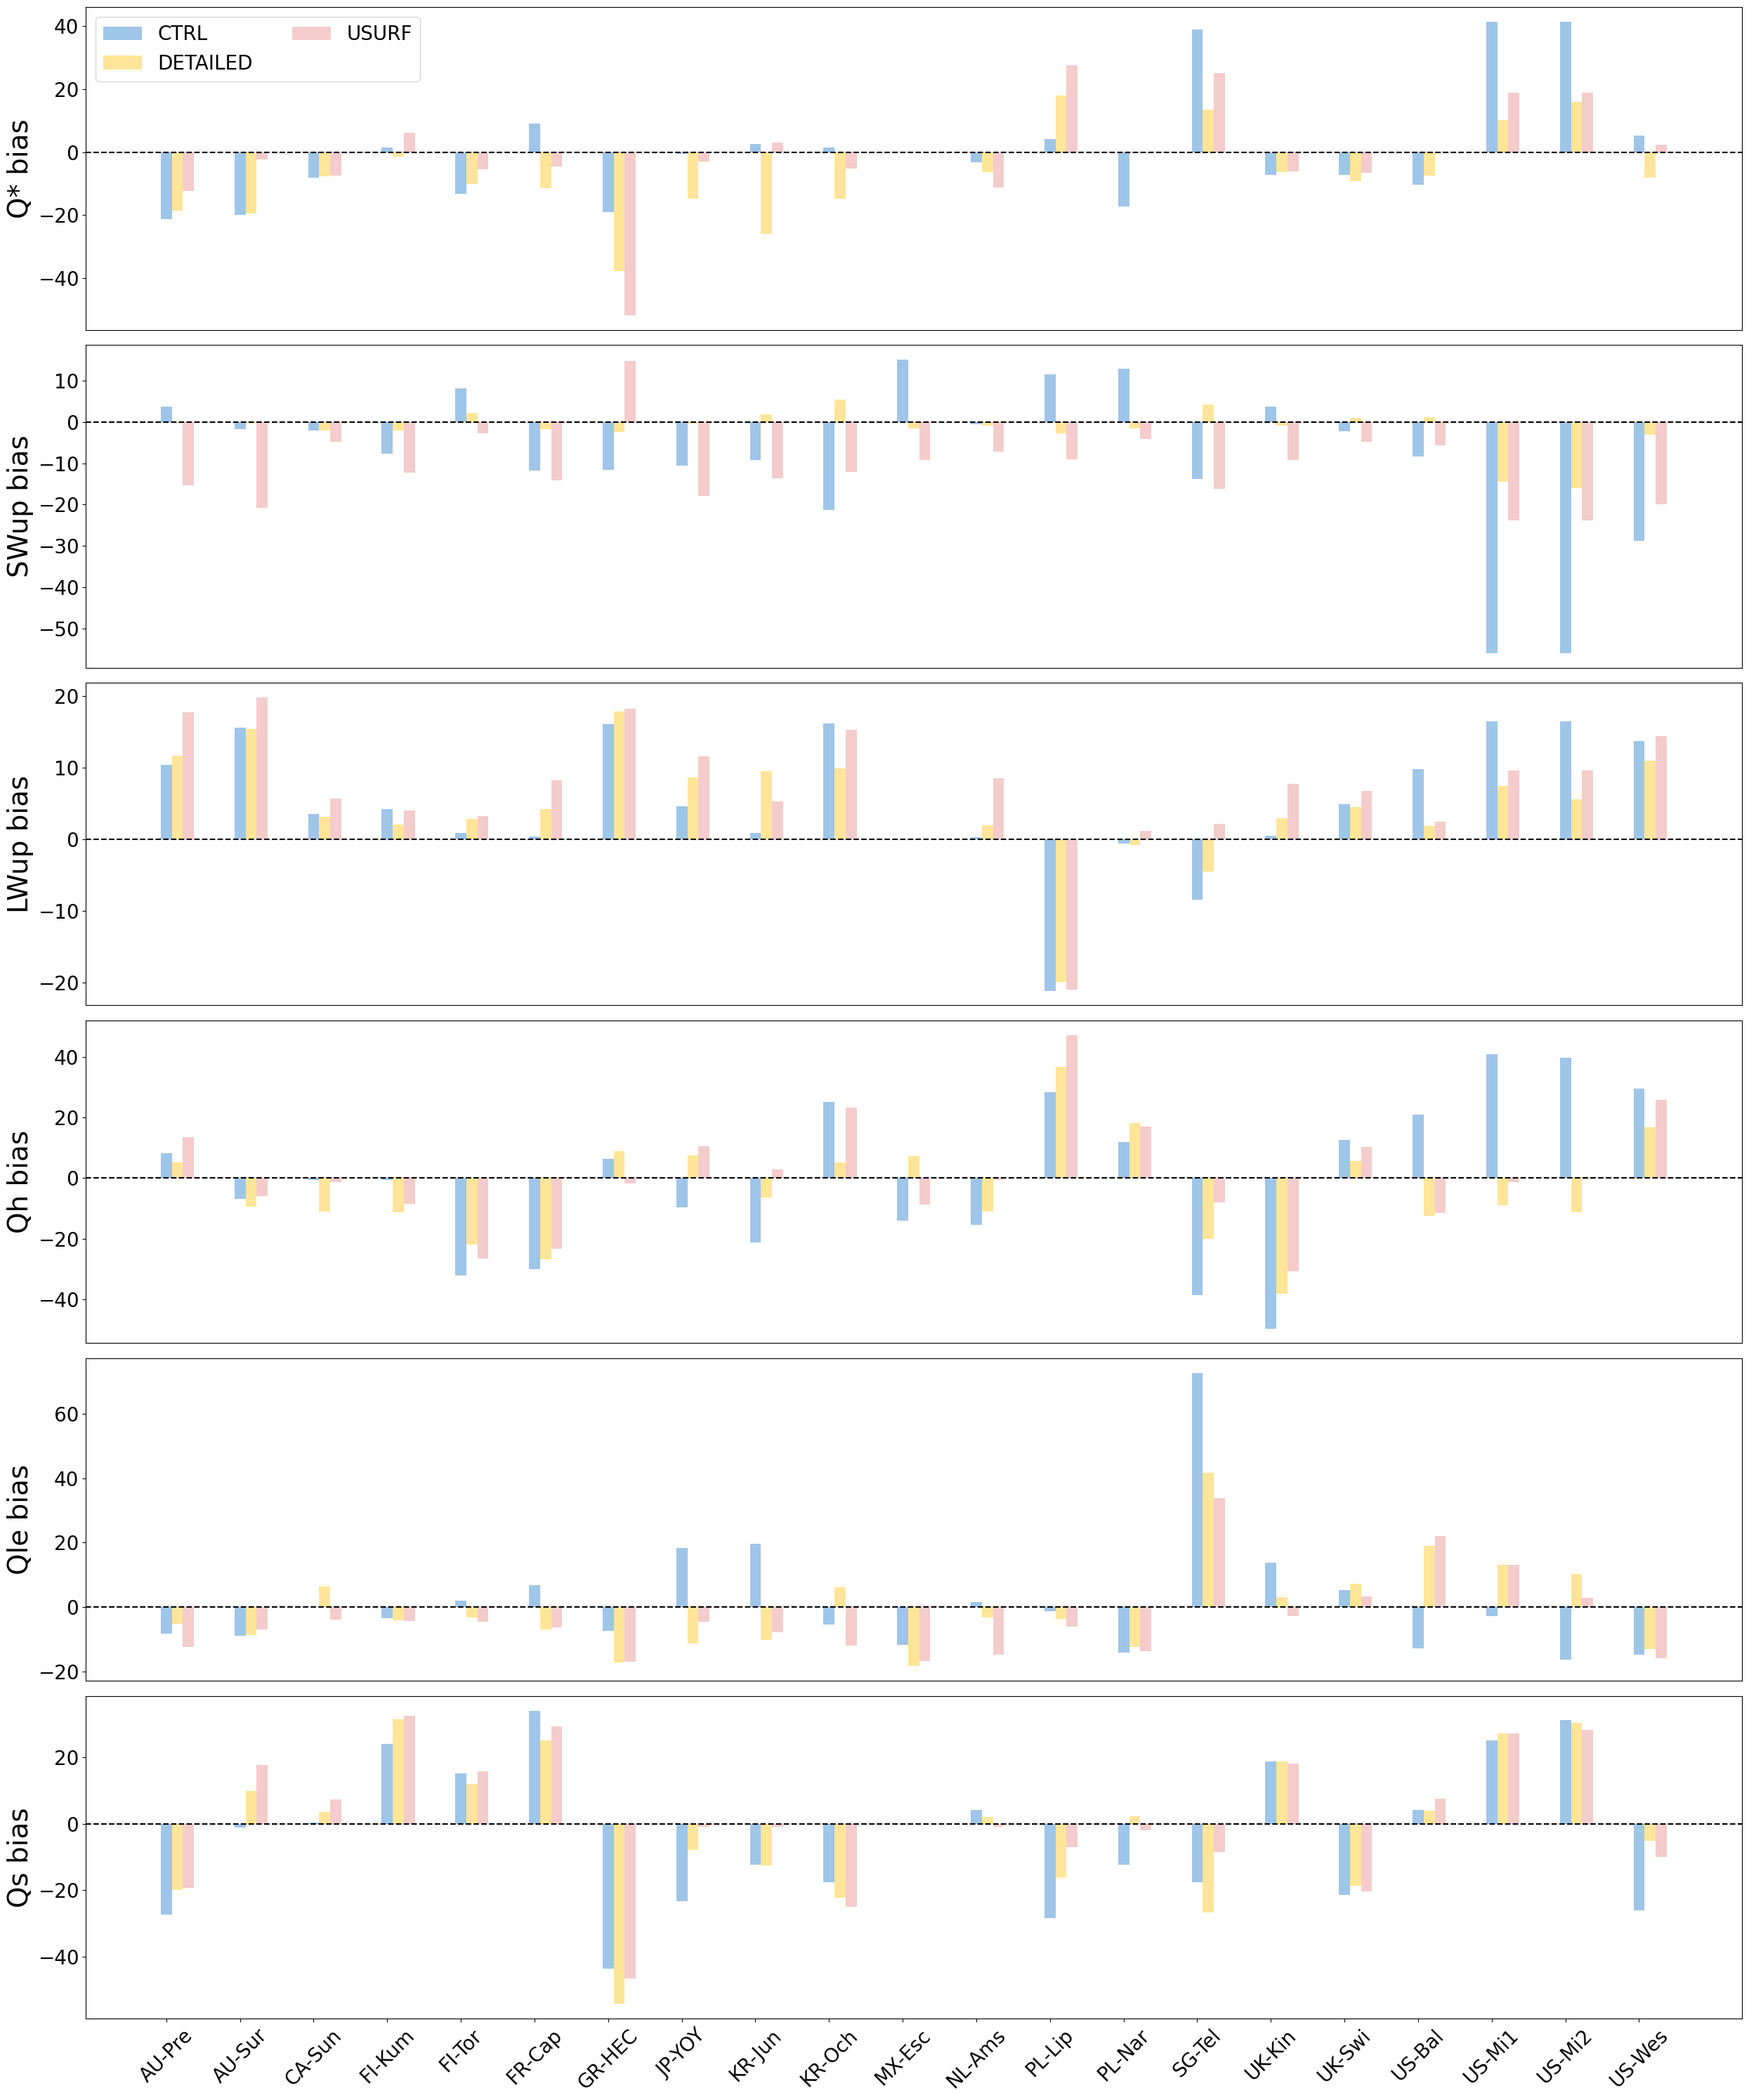

In [7]:
rad_vars = ["Q*", "SWup", "LWup", "Qh", "Qle", "Qs"]
fig,ax = plt.subplots(6,1,figsize=(25,30))
bar_width = 0.15
for i in range(6):
    var = rad_vars[i]
    var_longname = var_longname_dict[var]
    var_avgs = pd.read_csv(
        f"/glade/work/yifanc17/02_data/03_urban_plumber/YC_{var}_avgs_c250325.csv"
    )
    var_bias = pd.read_csv(
        f"/glade/work/yifanc17/02_data/03_urban_plumber/YC_{var}_bias_c250325.csv"
    )
    obs_avgs = var_avgs["obs"].tolist()
    ctrl_avgs = var_avgs["ctrl"].tolist()
    detailed_avgs = var_avgs["detailed"].tolist()
    test_avgs = var_avgs["test"].tolist()

    ctrl_bias = var_bias["ctrl"].tolist()
    detailed_bias = var_bias["detailed"].tolist()
    test_bias = var_bias["test"].tolist()
    ax[i].bar(
        np.arange(len(sites_sn)), ctrl_bias, width=bar_width, label="CTRL", color="#9fc5e8"
    )
    ax[i].bar(
        np.arange(len(sites_sn)) + bar_width,
        detailed_bias,
        width=bar_width,
        label="DETAILED",
        color="#ffe599",
    )
    ax[i].bar(
        np.arange(len(sites_sn)) + 2 * bar_width,
        test_bias,
        width=bar_width,
        label="USURF",
        color="#f4cccc",
    )
    ax[i].axhline(y=0, color='k', linewidth=1.5, linestyle='--') 

    ax[i].tick_params(axis="y", which="major", labelsize=20)
    ax[i].set_ylabel(var + " bias", fontsize=28)
    ax[i].set_xticks([])
ax[-1].set_xticks(np.arange(len(sites_sn)))
ax[-1].set_xticklabels(sites_sn, rotation=45, fontsize=20)

ax[0].legend(loc="upper left", ncol=2, bbox_to_anchor=(0, 1), prop={"size": 20})

fig.tight_layout()